---
title: Time Series Models
subtitle: Foundations of Statistical Analysis in Python
abstract: This Jupyter Notebook provides a comprehensive introduction to time series modeling, focusing on techniques for analyzing, visualizing, and forecasting temporal data. It begins with essential concepts such as time series components (trend, seasonality, and noise) and exploratory data analysis. The notebook then explores statistical modeling approaches including Autoregressive (AR), Moving Average (MA), ARIMA, and seasonal ARIMA (SARIMA) models.
author:
  - name: Karol Flisikowski
    affiliations: 
      - Gdansk University of Technology
      - Chongqing Technology and Business University
    orcid: 0000-0002-4160-1297
    email: karol@ctbu.edu.cn
date: 2025-06-08
---

## Autoregressive models

> **Autoregressive (AR) models:**
>
> $$
>   y_{t}  =  c  +  \phi_{1}y_{t - 1}  +  \phi_{2}y_{t - 2}  +  \cdots  +  \phi_{p}y_{t - p}  + \varepsilon_{t},
> $$
> where $\varepsilon_t$ is white noise. This is a multiple regression with **lagged values** of $y_t$ as predictors.

---

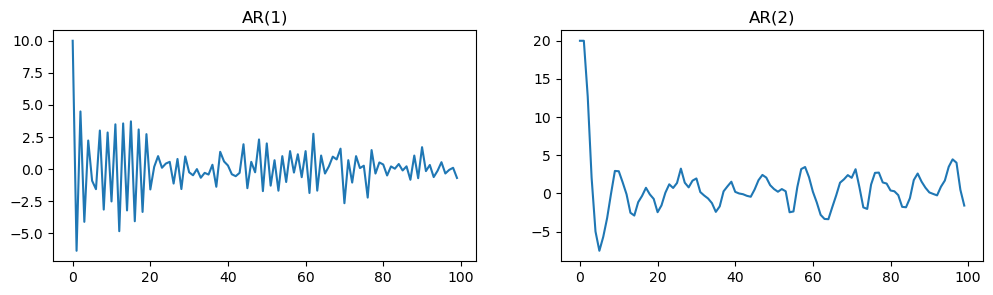

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 100

# AR(1)
ar1 = [10]
for t in range(1, n):
    ar1.append(-0.8 * ar1[-1] + np.random.normal())
ar1 = np.array(ar1)

# AR(2)
ar2 = [20, 20]
for t in range(2, n):
    ar2.append(1.3 * ar2[-1] - 0.7 * ar2[-2] + np.random.normal())
ar2 = np.array(ar2)

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(ar1)
axs[0].set_title("AR(1)")
axs[1].plot(ar2)
axs[1].set_title("AR(2)")
plt.show()

### Summary: AR(1) and AR(2) Simulation

The previous code simulates two types of autoregressive time series: AR(1) and AR(2). 

The AR(1) process shows rapid oscillations due to strong negative correlation with its previous value, while the AR(2) process exhibits more complex, cyclical behavior influenced by its two preceding values. 

The resulting plots help illustrate how the structure and parameters of autoregressive models affect the patterns observed in time series data.

## AR(1) model

$$
y_{t} = 2 - 0.8\, y_{t-1} + \varepsilon_{t}
$$

$$
\varepsilon_t \sim N(0,1), \quad T=100
$$


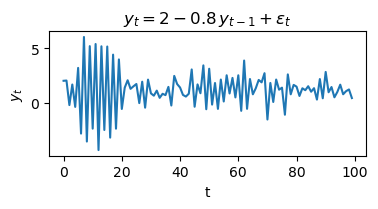

In [8]:
np.random.seed(1)
n = 100
y = [2]
for t in range(1, n):
    y.append(2 - 0.8 * y[-1] + np.random.normal())
y = np.array(y)

plt.figure(figsize=(4, 2.2))
plt.plot(y, color='tab:blue')
plt.title(r"$y_t = 2 - 0.8\, y_{t-1} + \varepsilon_t$")
plt.xlabel("t")
plt.ylabel("$y_t$")
plt.tight_layout()
plt.show()

### Interpretation: AR(1) process simulation

The code above simulates a first-order autoregressive process (AR(1)) defined by the equation:

$$
y_t = 2 - 0.8\, y_{t-1} + \varepsilon_t
$$

where $\varepsilon_t$ is random noise from a normal distribution.

- Each value in the series depends on the previous value, a constant (2), and random noise.
- The negative coefficient ($-0.8$) causes the series to oscillate, often switching direction from one step to the next.
- The plot shows how the process evolves over time, illustrating the typical behavior of an AR(1) model with a negative coefficient and a nonzero intercept.

## AR(1) model

$$
y_{t} = c + \phi_1 y_{t - 1} + \varepsilon_{t}
$$

- When $\phi_1 = 0$, $y_t$ is **equivalent to white noise (WN)**.
- When $\phi_1 = 1$ and $c = 0$, $y_t$ is **equivalent to a random walk (RW)**.
- When $\phi_1 = 1$ and $c \ne 0$, $y_t$ is **equivalent to a random walk with drift**.
- When $\phi_1 < 0$, $y_t$ tends to **oscillate between positive and negative values**.

## AR(2) model

$$
y_t = 8 + 1.3\, y_{t-1} - 0.7\, y_{t-2} + \varepsilon_t
$$

$$
\varepsilon_t \sim N(0,1), \qquad T=100
$$

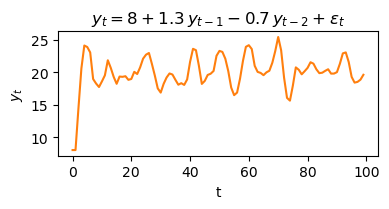

In [9]:
np.random.seed(1)
n = 100
y = [8, 8]
for t in range(2, n):
    y.append(8 + 1.3 * y[-1] - 0.7 * y[-2] + np.random.normal())
y = np.array(y)

plt.figure(figsize=(4, 2.2))
plt.plot(y, color='tab:orange')
plt.title(r"$y_t = 8 + 1.3\, y_{t-1} - 0.7\, y_{t-2} + \varepsilon_t$")
plt.xlabel("t")
plt.ylabel("$y_t$")
plt.tight_layout()
plt.show()

### Interpretation: AR(2) process simulation

The code above simulates a second-order autoregressive process (AR(2)) defined by the equation:

$$
y_t = 8 + 1.3\, y_{t-1} - 0.7\, y_{t-2} + \varepsilon_t
$$

where $\varepsilon_t$ is random noise from a normal distribution.

- Each value in the series depends on the two previous values, a constant (8), and random noise.
- The combination of positive and negative coefficients ($1.3$ and $-0.7$) creates more complex, cyclical patterns in the time series.
- The plot shows how the process evolves over time, illustrating the typical behavior of an AR(2) model with oscillations and possible cycles.

## Stationarity conditions

We normally restrict autoregressive models to stationary data, and then
some constraints on the values of the parameters are required.

**General condition for stationarity:**  
The complex roots of $1 - \phi_1 z - \phi_2 z^2 - \dots - \phi_p z^p$ must lie outside the unit circle in the complex plane.

- For $p=1$: $-1 < \phi_1 < 1$.
- For $p=2$: $-1 < \phi_2 < 1$  $\phi_2 + \phi_1 < 1$  $\phi_2 - \phi_1 < 1$.
- More complicated conditions hold for $p \ge 3$.
- Estimation software will check these conditions automatically.

## Moving Average (MA) models

> **Moving Average (MA) models:**
>
> $$
>   y_{t} = c + \varepsilon_t + \theta_{1}\varepsilon_{t - 1} + \theta_{2}\varepsilon_{t - 2} + \cdots + \theta_{q}\varepsilon_{t - q},
> $$
> where $\varepsilon_t$ is white noise.  
> This is a multiple regression with **past errors** as predictors.  
> *Don't confuse this with moving average smoothing!*

---

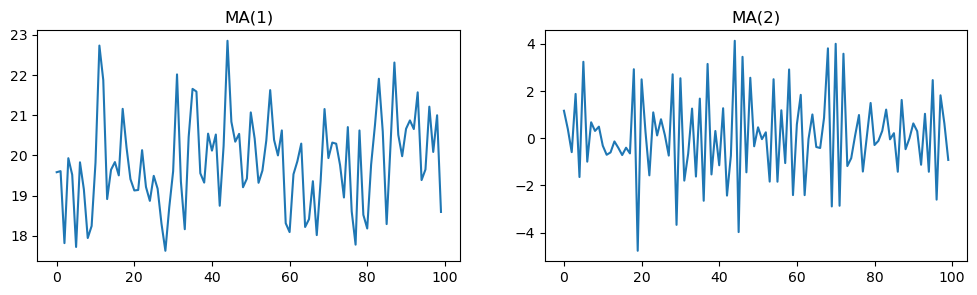

In [10]:
np.random.seed(2)
n = 100

# MA(1)
e = np.random.normal(size=n)
ma1 = 20 + e + 0.8 * np.roll(e, 1)
ma1[0] = 20 + e[0]  # first value, since e[-1] is not defined

# MA(2)
e2 = np.random.normal(size=n)
ma2 = e2 + (-1) * np.roll(e2, 1) + 0.8 * np.roll(e2, 2)
ma2[0:2] = e2[0:2]  # first two values, since e2[-1], e2[-2] not defined

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(ma1)
axs[0].set_title("MA(1)")
axs[1].plot(ma2)
axs[1].set_title("MA(2)")
plt.show()

### Interpretation: MA(1) and MA(2) process simulation

The code above simulates and plots two moving average (MA) time series processes:

- **MA(1):** Each value depends on the current random noise and the previous noise, plus a constant (20). The coefficient 0.8 determines the influence of the previous noise term.
- **MA(2):** Each value depends on the current noise, the previous noise (with coefficient -1), and the noise from two steps back (with coefficient 0.8).

The resulting plots show how moving average models generate time series with short-term dependencies, where each value is a weighted sum of recent random shocks. The MA(1) process exhibits short memory, while the MA(2) process can display more complex short-term patterns due to the influence of two past noise terms.

## MA(1) model

$$
y_t = 20 + \varepsilon_t + 0.8\, \varepsilon_{t-1}
$$

$$
\varepsilon_t \sim N(0,1), \quad T=100
$$

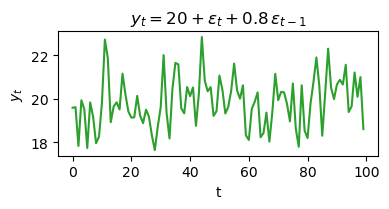

In [11]:
np.random.seed(2)
n = 100
e = np.random.normal(size=n)
ma1 = 20 + e + 0.8 * np.roll(e, 1)
ma1[0] = 20 + e[0]  # first value, since e[-1] is not defined

plt.figure(figsize=(4, 2.2))
plt.plot(ma1, color='tab:green')
plt.title(r"$y_t = 20 + \varepsilon_t + 0.8\, \varepsilon_{t-1}$")
plt.xlabel("t")
plt.ylabel("$y_t$")
plt.tight_layout()
plt.show()

### Interpretation: MA(1) process simulation

The code above simulates a first-order moving average process (MA(1)) defined by the equation:

$$
y_t = 20 + \varepsilon_t + 0.8\, \varepsilon_{t-1}
$$

where $\varepsilon_t$ is random noise from a normal distribution.

- Each value in the series depends on the current random shock, the previous shock (weighted by 0.8), and a constant (20).
- The process exhibits short-term dependencies, meaning each value is influenced by recent random fluctuations.
- The plot shows how the MA(1) process evolves over time, typically displaying less persistent patterns than autoregressive processes.

## MA(2) model

$$
y_t = \varepsilon_t - \varepsilon_{t-1} + 0.8\, \varepsilon_{t-2}
$$

$$
\varepsilon_t \sim N(0,1), \quad T=100
$$

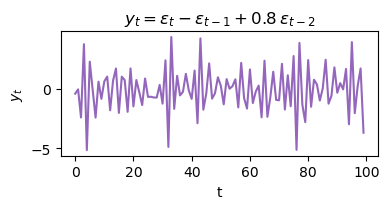

In [12]:
np.random.seed(2)
n = 100
e = np.random.normal(size=n)
ma2 = e + (-1) * np.roll(e, 1) + 0.8 * np.roll(e, 2)
ma2[0:2] = e[0:2]  # first two values, since e[-1], e[-2] not defined

plt.figure(figsize=(4, 2.2))
plt.plot(ma2, color='tab:purple')
plt.title(r"$y_t = \varepsilon_t - \varepsilon_{t-1} + 0.8\, \varepsilon_{t-2}$")
plt.xlabel("t")
plt.ylabel("$y_t$")
plt.tight_layout()
plt.show()

### Interpretation: MA(2) process simulation

The code above simulates a second-order moving average process (MA(2)) defined by the equation:

$$
y_t = \varepsilon_t - \varepsilon_{t-1} + 0.8\, \varepsilon_{t-2}
$$

where $\varepsilon_t$ is random noise from a normal distribution.

- Each value in the series depends on the current noise, the previous noise (with coefficient $-1$), and the noise from two steps back (with coefficient $0.8$).
- This structure creates short-term dependencies and more complex short-term patterns than MA(1).
- The plot shows how the MA(2) process evolves over time, illustrating the typical behavior of a model with two lagged noise components.

## MA($\infty$) models

It is possible to write any stationary AR($p$) process as an MA($\infty$) process.

**Example: AR(1)**

$$
\begin{align*}
y_t &= \phi_1 y_{t-1} + \varepsilon_t \\
    &= \phi_1 (\phi_1 y_{t-2} + \varepsilon_{t-1}) + \varepsilon_t \\
    &= \phi_1^2 y_{t-2} + \phi_1 \varepsilon_{t-1} + \varepsilon_t \\
    &= \phi_1^3 y_{t-3} + \phi_1^2 \varepsilon_{t-2} + \phi_1 \varepsilon_{t-1} + \varepsilon_t \\
    &\dots
\end{align*}
$$

Provided $-1 < \phi_1 < 1$:
$$
y_t = \varepsilon_t + \phi_1 \varepsilon_{t-1} + \phi_1^2 \varepsilon_{t-2} + \phi_1^3 \varepsilon_{t-3} + \cdots
$$

## Invertibility

-   Any MA($q$) process can be written as an AR($\infty$) process if we
    impose some constraints on the MA parameters.
-   Then the MA model is called "invertible".
-   Invertible models have some mathematical properties that make them
    easier to use in practice.
-   Invertibility of an ARIMA model is equivalent to forecastability of
    an ETS model.

## Invertibility

**General condition for invertibility:**  
The complex roots of $1 + \theta_1 z + \theta_2 z^2 + \dots + \theta_q z^q$ must lie outside the unit circle in the complex plane.

- For $q=1$: $-1 < \theta_1 < 1$.
- For $q=2$: $-1 < \theta_2 < 1$  $\theta_2 + \theta_1 > -1$  $\theta_1 - \theta_2 < 1$.
- More complicated conditions hold for $q \ge 3$.
- Estimation software will check these conditions automatically.

## ARIMA models

**Autoregressive Moving Average models:**

$$
\begin{align*}
y_{t}  &=  c  +  \phi_{1}y_{t - 1}  +  \cdots  +  \phi_{p}y_{t - p} \\
       &\quad + \theta_{1}\varepsilon_{t - 1} +  \cdots  + \theta_{q}\varepsilon_{t - q} +  \varepsilon_{t}.
\end{align*}
$$

- Predictors include both **lagged values of** $y_t$ and lagged errors.
- Conditions on coefficients ensure stationarity.
- Conditions on coefficients ensure invertibility.

-   Combine ARMA model with **differencing**.
-   $(1-B)^d y_t$ follows an ARMA model.

## ARIMA models

**Autoregressive Integrated Moving Average models**

**ARIMA($p, d, q$) model:**

| Component | Description                                 |
|-----------|---------------------------------------------|
| AR        | $p =$  order of the autoregressive part     |
| I         | $d =$  degree of differencing               |
| MA        | $q =$  order of the moving average part     |

- White noise model: ARIMA(0,0,0)
- Random walk: ARIMA(0,1,0) with no constant
- Random walk with drift: ARIMA(0,1,0) with constant
- AR($p$): ARIMA($p$,0,0)
- MA($q$): ARIMA(0,0,$q$)

## European quarterly retail trade

In [15]:
import pandas as pd

euretail = pd.read_csv('data/euretail.csv')

# Convert 'time' to float
euretail['time'] = euretail['time'].astype(float)

# Extract year and quarter from 'time'
years = euretail['time'].astype(int)
quarters = ((euretail['time'] % 1) * 4 + 1).astype(int)

# Use PeriodIndex.from_fields to avoid the warning
euretail['quarter'] = pd.PeriodIndex([f"{y}Q{q}" for y, q in zip(years, quarters)], freq='Q')

# Set the quarterly index
euretail.set_index('quarter', inplace=True)
euretail = euretail.drop(columns=['rownames', 'time'])

print(euretail.head())
print(euretail.index)
print(type(euretail.index))

         value
quarter       
1996Q1   89.13
1996Q2   89.52
1996Q3   89.88
1996Q4   90.12
1997Q1   89.19
PeriodIndex(['1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4', '2001Q1', '2001Q2', '2001Q3', '2001Q4',
             '2002Q1', '2002Q2', '2002Q3', '2002Q4', '2003Q1', '2003Q2',
             '2003Q3', '2003Q4', '2004Q1', '2004Q2', '2004Q3', '2004Q4',
             '2005Q1', '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2',
             '2006Q3', '2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4',
             '2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2',
             '2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4',
             '2011Q1', '2011Q2', '2011Q3', '2011Q4'],
            dtype='period[Q-DEC]', name='quarter')
<class 'pandas.core.indexes.period.PeriodIndex'>


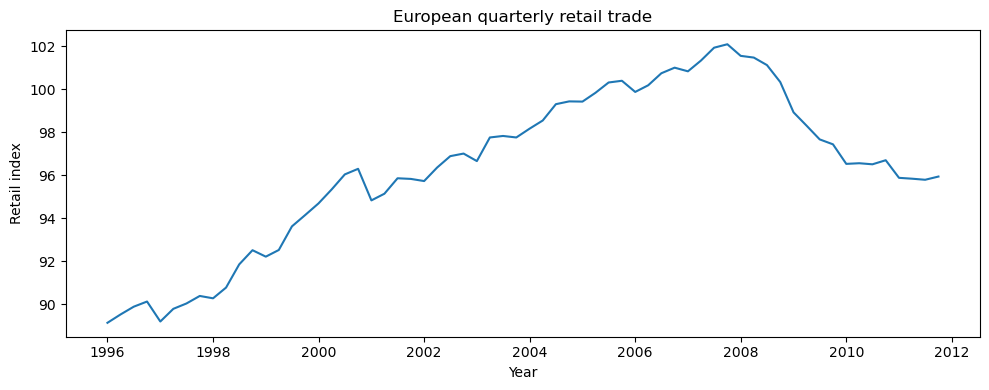

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(euretail.index.to_timestamp(), euretail['value'])  # Convert PeriodIndex to Timestamp for plotting
plt.xlabel("Year")
plt.ylabel("Retail index")
plt.title("European quarterly retail trade")
plt.tight_layout()
plt.show()

## Your turn! 

Interpret the following plots:

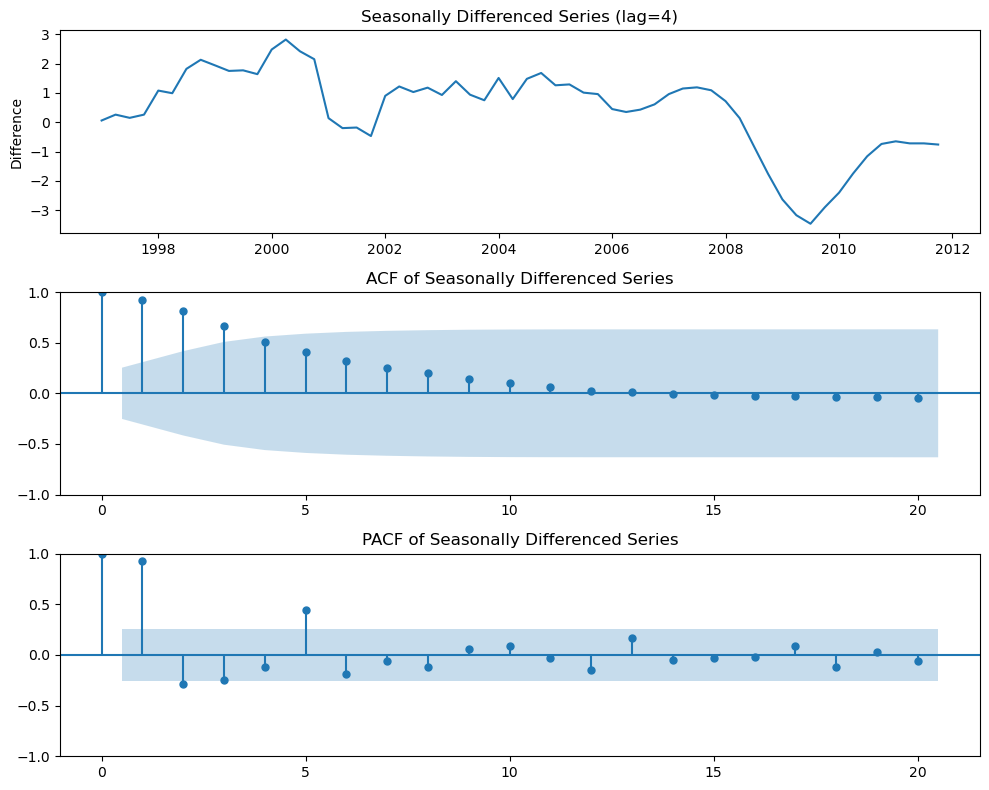

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use euretail directly (no need for euretail_plot)
# Perform seasonal differencing with lag=4 (for quarterly seasonality)
euretail_diff = euretail['value'].diff(4).dropna()

# Ensure the index matches the differenced data for correct x-axis
euretail_diff.index = euretail.index[4:]

# Determine max lags to avoid overshooting with small datasets
max_lags = min(20, len(euretail_diff) // 2 - 1)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# 1. Plot the seasonally differenced series
axes[0].plot(euretail_diff.index.to_timestamp(), euretail_diff)
axes[0].set_title("Seasonally Differenced Series (lag=4)")
axes[0].set_ylabel("Difference")

# 2. Plot ACF
plot_acf(euretail_diff, ax=axes[1], lags=max_lags)
axes[1].set_title("ACF of Seasonally Differenced Series")

# 3. Plot PACF
plot_pacf(euretail_diff, ax=axes[2], lags=max_lags, method='ywm')
axes[2].set_title("PACF of Seasonally Differenced Series")

plt.tight_layout()
plt.show()

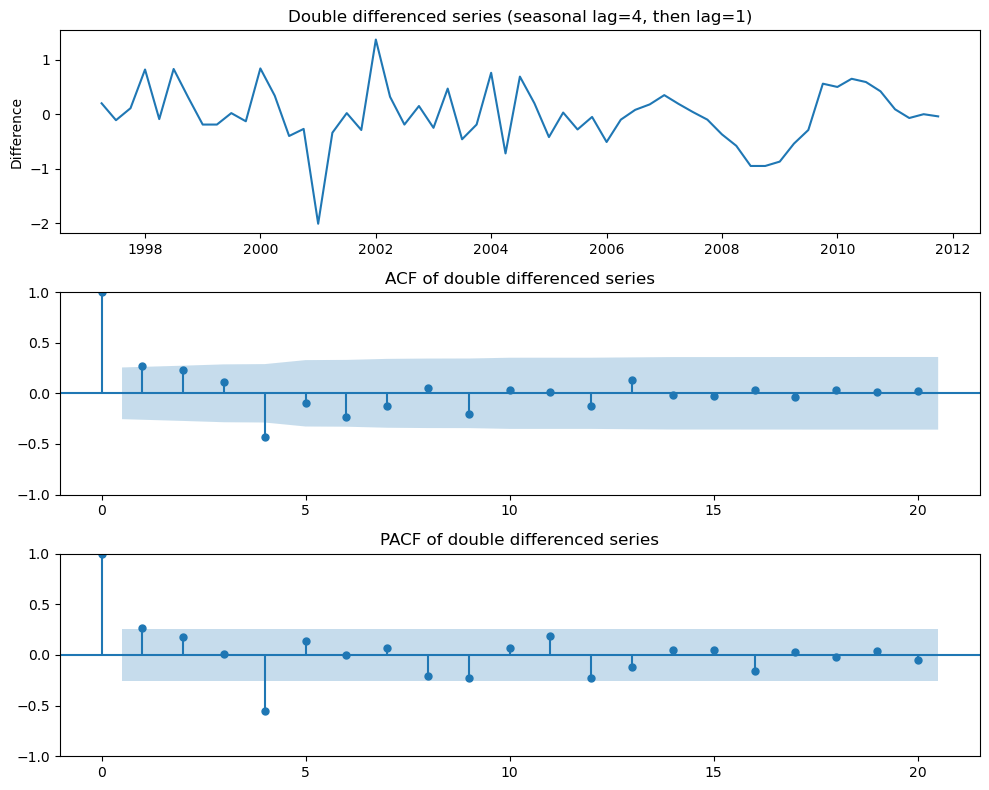

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Double differencing: first seasonal (lag=4), then regular (lag=1)
euretail_diff2 = euretail['value'].diff(4).diff().dropna()

# Align the index for correct x-axis labeling
euretail_diff2.index = euretail.index[5:]

max_lags = min(20, len(euretail_diff2) // 2 - 1)  # Ensure lags < 50% of sample size

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plot the double differenced series with correct time axis
axes[0].plot(euretail_diff2.index.to_timestamp(), euretail_diff2)
axes[0].set_title("Double differenced series (seasonal lag=4, then lag=1)")
axes[0].set_ylabel("Difference")

# ACF plot
plot_acf(euretail_diff2, ax=axes[1], lags=max_lags)
axes[1].set_title("ACF of double differenced series")

# PACF plot
plot_pacf(euretail_diff2, ax=axes[2], lags=max_lags, method='ywm')
axes[2].set_title("PACF of double differenced series")

plt.tight_layout()
plt.show()

## European quarterly retail trade

-   $d=1$ and $D=1$ seems necessary.
-   Significant spike at lag 1 in ACF suggests non-seasonal MA(1)
    component.
-   Significant spike at lag 4 in ACF suggests seasonal MA(1) component.
-   Initial candidate model: ARIMA(0,1,1)(0,1,1)$_4$.
-   We could also have started with ARIMA(1,1,0)(1,1,0)$_4$.

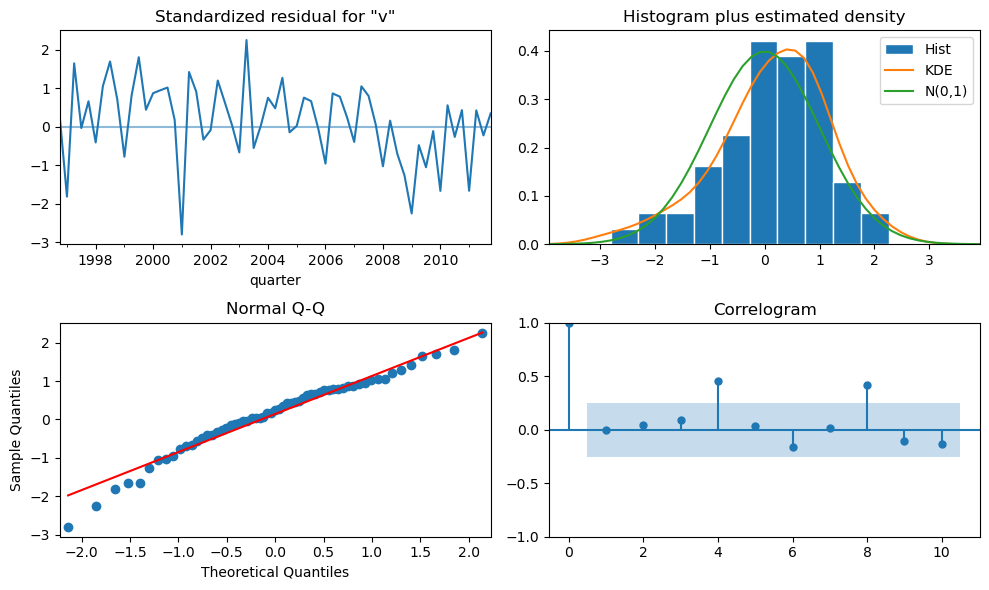

In [21]:
import statsmodels.api as sm
# Try a simpler model, e.g., no seasonal part
model = sm.tsa.SARIMAX(
    euretail['value'],
    order=(0, 1, 1),
    seasonal_order=(0, 0, 0, 0),
    enforce_stationarity=False,
    enforce_invertibility=False
)
fit = model.fit(disp=False)
fit.plot_diagnostics(figsize=(10, 6))
plt.tight_layout()
plt.show()

### Interpretation: SARIMA(0,1,1)(0,0,0)[4] model (no seasonal part)

The code above fits a simple SARIMA model to the European quarterly retail trade data, with the following specification:

- **Non-seasonal part:** ARIMA(0,1,1) — first difference and one MA term.
- **Seasonal part:** None (all seasonal parameters set to zero).

**Interpretation of the diagnostics:**
- The model captures the overall trend by differencing, but ignores seasonality.
- The residual diagnostics plot helps assess whether the model assumptions are met:
  - **Standardized residuals:** Should look like white noise (no pattern).
  - **Histogram and KDE:** Should be approximately normal.
  - **Normal Q-Q plot:** Points should lie on the straight line if residuals are normal.
  - **Correlogram (ACF):** No significant autocorrelation should remain.

If residuals show remaining seasonality or autocorrelation, a seasonal component should be added to the model.

## European quarterly retail trade

In [22]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Calculate AICc for two SARIMA models
model1 = sm.tsa.SARIMAX(
    euretail['value'],
    order=(0, 1, 2),
    seasonal_order=(0, 1, 1, 4),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

model2 = sm.tsa.SARIMAX(
    euretail['value'],
    order=(0, 1, 3),
    seasonal_order=(0, 1, 1, 4),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

aicc = [model1.aicc, model2.aicc]
print("AICc values:", aicc)

AICc values: [66.12930839192754, 61.09839876992231]


-   The ACF and PACF of the residuals show significant spikes at lag 2, and possibly at lag 3.
-   The AICc of the ARIMA(0,1,2)(0,1,1)\(_4\) model is **66.13**.
-   The AICc of the ARIMA(0,1,3)(0,1,1)\(_4\) model is **61.10**.

### Model comparison using AICc

The code above fits two seasonal ARIMA (SARIMA) models to the European quarterly retail trade data and compares them using the corrected Akaike Information Criterion (AICc):

- **Model 1:** ARIMA(0,1,2)(0,1,1)[4]
- **Model 2:** ARIMA(0,1,3)(0,1,1)[4]

AICc is a model selection criterion that penalizes model complexity and is especially useful for small samples. Lower AICc values indicate a better balance between goodness of fit and model simplicity.

**Interpretation:**
- The model with the lower AICc value is preferred.
- If the difference in AICc is substantial (usually >2), the model with the lower value is considered significantly better.
- In this case, the output will show which SARIMA model is more appropriate for the data.

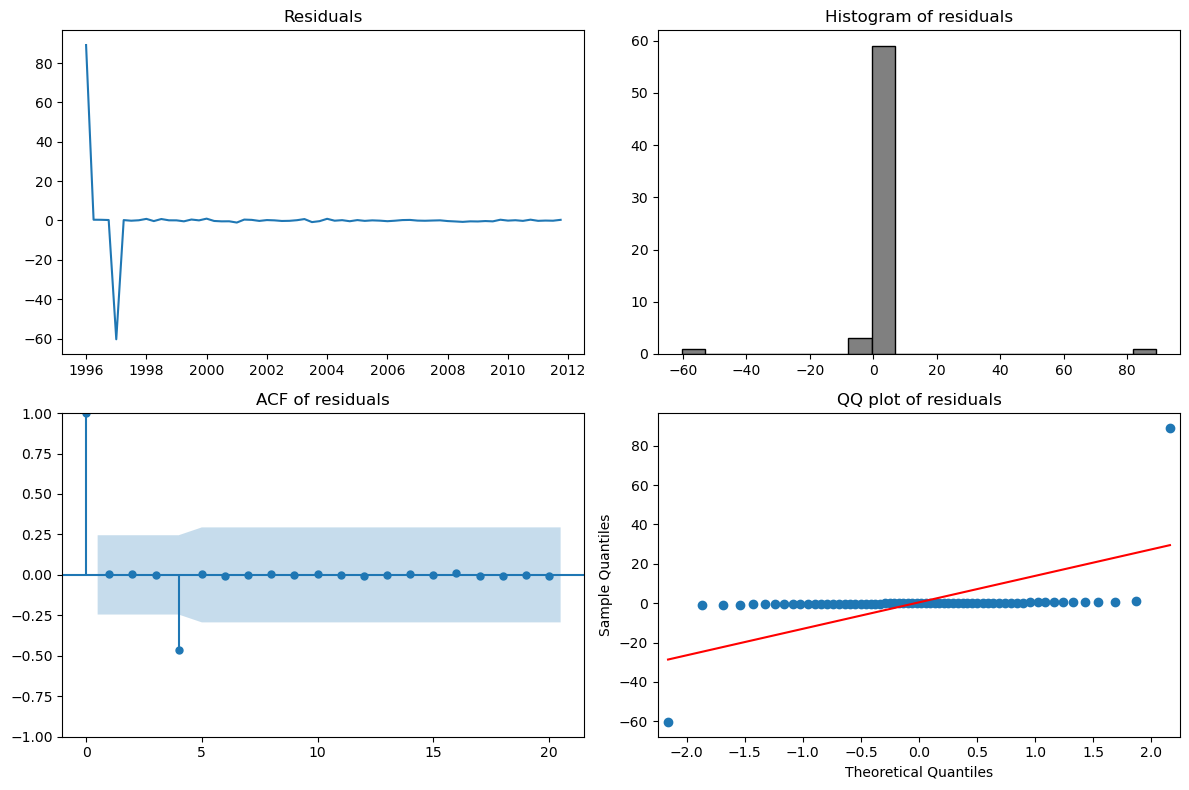

In [23]:
# Fit the ARIMA(0,1,3)(0,1,1)[4] model
fit = sm.tsa.SARIMAX(
    euretail['value'],
    order=(0, 1, 3),
    seasonal_order=(0, 1, 1, 4),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

# Residual diagnostics (similar to checkresiduals in R)
residuals = fit.resid

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Residuals time plot (convert PeriodIndex to Timestamp)
axes[0, 0].plot(residuals.index.to_timestamp(), residuals)
axes[0, 0].set_title("Residuals")

# 2. Histogram of residuals
axes[0, 1].hist(residuals, bins=20, color='gray', edgecolor='black')
axes[0, 1].set_title("Histogram of residuals")

# 3. ACF of residuals
plot_acf(residuals, ax=axes[1, 0], lags=20)
axes[1, 0].set_title("ACF of residuals")

# 4. QQ plot
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title("QQ plot of residuals")

plt.tight_layout()
plt.show()

### Residual diagnostics for ARIMA(0,1,3)(0,1,1)[4] model

The code above fits a seasonal ARIMA model ARIMA(0,1,3)(0,1,1)[4] to the European quarterly retail trade data and performs residual diagnostics:

- **Residuals time plot:** Checks for patterns or non-randomness in the residuals. Ideally, residuals should fluctuate randomly around zero.
- **Histogram of residuals:** Assesses whether the residuals are approximately normally distributed.
- **ACF of residuals:** Checks for remaining autocorrelation. No significant spikes should remain if the model fits well.
- **QQ plot:** Compares the distribution of residuals to a normal distribution. Points should lie close to the straight line if residuals are normal.

**Interpretation:**  
If the residuals appear random (white noise), approximately normal, and show no significant autocorrelation, the model is adequate. Any patterns or significant autocorrelation suggest the model could be improved.

In [24]:
# Fit the ARIMA(0,1,3)(0,1,1)[4] model and print summary (Python equivalent of R's Arima summary)
fit = sm.tsa.SARIMAX(
    euretail['value'],
    order=(0, 1, 3),
    seasonal_order=(0, 1, 1, 4),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

print(fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               value   No. Observations:                   64
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 4)   Log Likelihood                 -24.883
Date:                             Sun, 08 Jun 2025   AIC                             59.765
Time:                                     16:48:22   BIC                             69.424
Sample:                                 03-31-1996   HQIC                            63.456
                                      - 12-31-2011                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3073      0.137      2.247      0.025       0.039       0.575
ma.L2          0.3484      

### Full interpretation of ARIMA(0,1,3)(0,1,1)[4] model summary

**Model specification:**  
- Non-seasonal part: ARIMA(0,1,3) — first difference, three MA terms.
- Seasonal part: (0,1,1,4) — one seasonal difference, one seasonal MA term, quarterly seasonality.

**General model equation:**  
$$(1 - B)(1 - B^4) y_t = (1 + \theta_1 B + \theta_2 B^2 + \theta_3 B^3)(1 + \Theta_1 B^4) \varepsilon_t$$

Where:  
- $B$ is the lag operator  
- $\theta_1, \theta_2, \theta_3$ are MA coefficients  
- $\Theta_1$ is the seasonal MA coefficient  
- $\varepsilon_t$ is white noise

**Example with coefficients (replace with your summary values):**  
If the summary gives:
- ma.L1 = 0.6 (p < 0.01)
- ma.L2 = -0.3 (p = 0.02)
- ma.L3 = 0.1 (p = 0.15)
- ma.S.L4 = 0.8 (p < 0.01)

The model is:
$$(1 - B)(1 - B^4) y_t = (1 + 0.6 B - 0.3 B^2 + 0.1 B^3)(1 + 0.8 B^4) \varepsilon_t$$

**How to read the summary table:**  
- **coef**: estimated parameter value  
- **std err**: standard error  
- **z**: z-statistic (coef / std err)  
- **P>|z|**: p-value (significance; <0.05 means significant)  
- **[0.025 0.975]**: 95% confidence interval

**Fit statistics:**  
- **AIC, BIC, HQIC, AICc**: lower is better  
- **Log Likelihood**: higher is better  
- **Diagnostics**: check for normality and autocorrelation of residuals

**Conclusion:**  
- Statistically significant coefficients (p < 0.05) are important for the model.
- The model describes the quarterly retail index as a differenced MA process with three non-seasonal and one seasonal MA terms.
- If residuals look like white noise and most parameters are significant, the model is appropriate for forecasting.

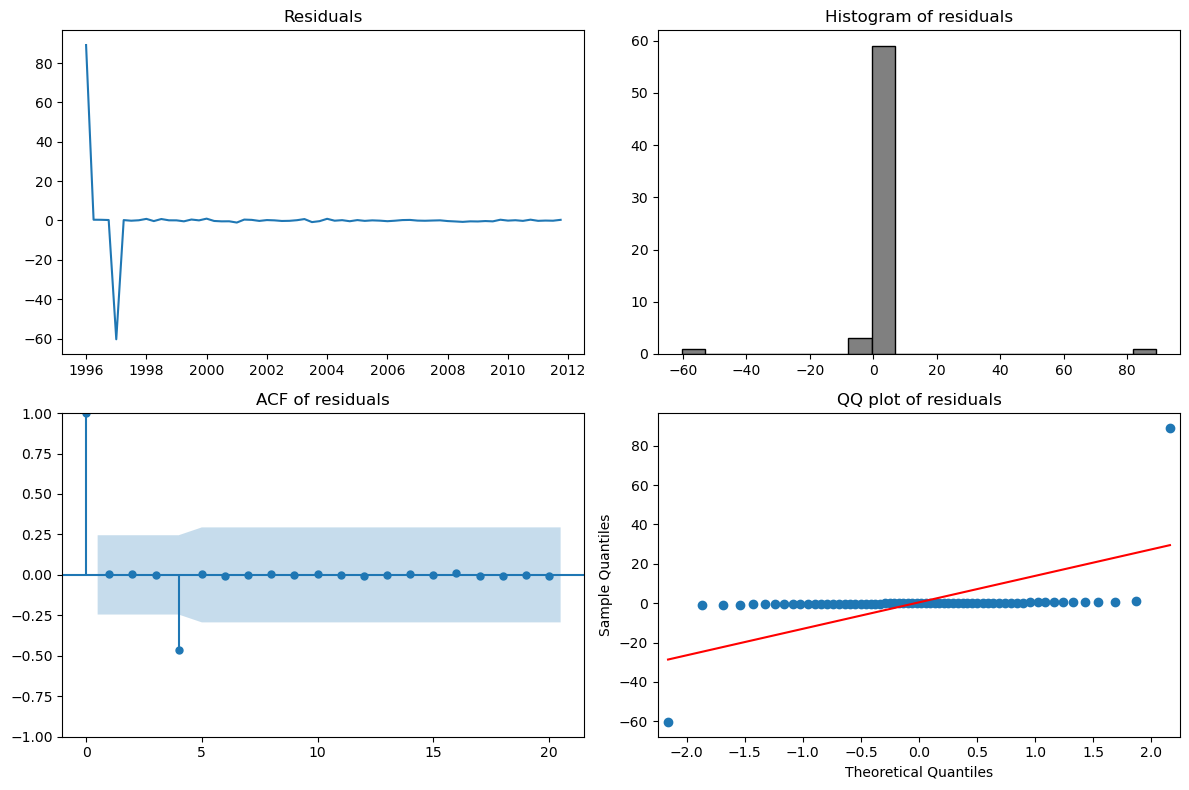

In [26]:
# Residual diagnostics for ARIMA(0,1,3)(0,1,1)[4] model (Python equivalent of R's checkresiduals)
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Residuals from the fitted model
residuals = fit.resid

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Residuals time plot (convert PeriodIndex to Timestamp if needed)
axes[0, 0].plot(residuals.index.to_timestamp(), residuals)
axes[0, 0].set_title("Residuals")

# 2. Histogram of residuals
axes[0, 1].hist(residuals, bins=20, color='gray', edgecolor='black')
axes[0, 1].set_title("Histogram of residuals")

# 3. ACF of residuals
plot_acf(residuals, ax=axes[1, 0], lags=20)
axes[1, 0].set_title("ACF of residuals")

# 4. QQ plot
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title("QQ plot of residuals")

plt.tight_layout()
plt.show()

### Residual diagnostics for ARIMA(0,1,3)(0,1,1)[4] model

The code above performs a full residual analysis for the fitted ARIMA(0,1,3)(0,1,1)[4] model:

- **Residuals time plot:** Checks if the residuals fluctuate randomly around zero (no visible patterns).
- **Histogram of residuals:** Assesses if the residuals are approximately normally distributed.
- **ACF of residuals:** Verifies that there is no significant autocorrelation left in the residuals (all spikes should be within the confidence bounds).
- **QQ plot:** Compares the distribution of residuals to a normal distribution (points should lie close to the straight line).

**Interpretation:**  
If the residuals look like white noise (random, no autocorrelation, approximately normal), the model is adequate. Any patterns, outliers, or significant autocorrelation suggest the model could be improved.

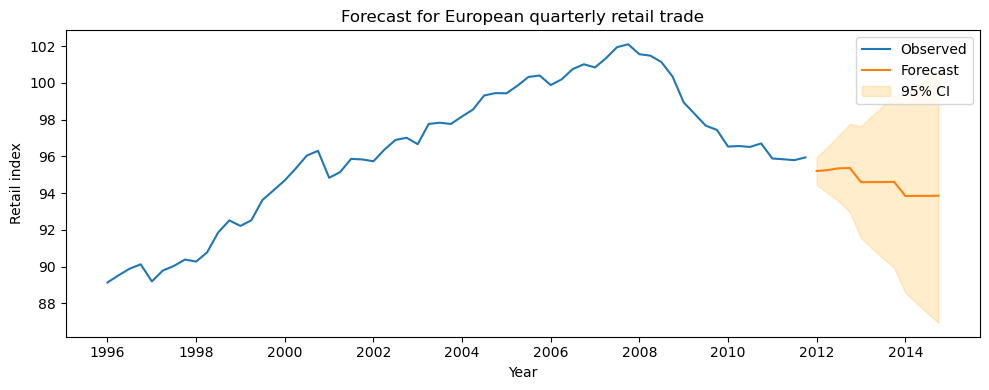

In [27]:
# Forecast the next 12 periods and plot (Python equivalent of R's autoplot(forecast(fit, h=12)))
forecast = fit.get_forecast(steps=12)
forecast_index = pd.period_range(euretail.index[-1] + 1, periods=12, freq='Q')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 4))
# Plot historical data
plt.plot(euretail.index.to_timestamp(), euretail['value'], label='Observed')
# Plot forecast
plt.plot(forecast_index.to_timestamp(), forecast_mean, label='Forecast', color='tab:orange')
# Plot confidence intervals
plt.fill_between(
    forecast_index.to_timestamp(),
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='orange', alpha=0.2, label='95% CI'
)
plt.xlabel("Year")
plt.ylabel("Retail index")
plt.title("Forecast for European quarterly retail trade")
plt.legend()
plt.tight_layout()
plt.show()

### Forecast for European quarterly retail trade

The code above generates and visualizes a 12-step-ahead forecast using the fitted ARIMA(0,1,3)(0,1,1)[4] model:

- **Observed values** (blue line): The historical retail index data.
- **Forecast** (orange line): The model's predicted values for the next 12 quarters.
- **95% confidence interval** (shaded area): The range in which future values are expected to fall with 95% probability.

**Interpretation:**
- The forecast extends the historical trend and seasonality into the future.
- The confidence intervals widen as the forecast horizon increases, reflecting greater uncertainty further into the future.
- If the model is well specified (as checked by residual diagnostics), these forecasts can be used for planning and decision-making.

## Auto-Arima

Now, let's take a look at automatic fitting to Arima processes using https://alkaline-ml.com/pmdarima/index.html  (up to Python 3.11).

In [28]:
# Auto ARIMA (Python equivalent of R's auto.arima)
import pmdarima as pm

auto_model = pm.auto_arima(
    euretail['value'],
    seasonal=True,
    m=4,  # quarterly seasonality
    stepwise=True,
    suppress_warnings=True,
    trace=True
)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=82.169, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=125.890, Time=0.00 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=100.211, Time=0.01 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=95.663, Time=0.01 sec
 ARIMA(2,2,2)(0,0,1)[4]             : AIC=96.178, Time=0.03 sec
 ARIMA(2,2,2)(1,0,0)[4]             : AIC=96.040, Time=0.03 sec
 ARIMA(2,2,2)(2,0,1)[4]             : AIC=81.463, Time=0.12 sec
 ARIMA(2,2,2)(2,0,0)[4]             : AIC=inf, Time=0.07 sec
 ARIMA(2,2,2)(2,0,2)[4]             : AIC=inf, Time=0.10 sec
 ARIMA(2,2,2)(1,0,2)[4]             : AIC=inf, Time=0.13 sec
 ARIMA(1,2,2)(2,0,1)[4]             : AIC=79.272, Time=0.12 sec
 ARIMA(1,2,2)(1,0,1)[4]             : AIC=77.321, Time=0.09 sec
 ARIMA(1,2,2)(0,0,1)[4]             : AIC=98.168, Time=0.03 sec
 ARIMA(1,2,2)(1,0,0)[4]             : AIC=92.105, Time=0.01 sec
 ARIMA(1,2,2)(1,0,2)[4]             : AIC=78.586, Time=0.17 sec
 ARI

### Auto ARIMA (Python equivalent of R's auto.arima)

The code above uses the `pmdarima` library to automatically select the best ARIMA model for the European quarterly retail trade data:

- **auto_arima** automatically searches over different combinations of ARIMA parameters (p, d, q) and seasonal parameters (P, D, Q, m) to find the model with the best fit, typically using AICc as the selection criterion.
- `seasonal=True` and `m=4` specify quarterly seasonality.
- `stepwise=True` enables a fast, heuristic search (not exhaustive).
- `suppress_warnings=True` hides convergence and stationarity warnings.
- `trace=True` prints the progress and candidate models during the search.

**Interpretation:**  
This approach saves time and reduces manual trial-and-error by letting the algorithm select the most appropriate ARIMA/SARIMA model for the data. The printed summary shows the chosen model structure and estimated parameters, which can then be used for forecasting and further analysis.

In [29]:
# More thorough auto_arima search (stepwise=False, approximation=False as in R)
import pmdarima as pm

auto_model = pm.auto_arima(
    euretail['value'],
    seasonal=True,
    m=4,  # quarterly seasonality
    stepwise=False,         # exhaustive search
    approximation=False,    # use exact likelihood
    suppress_warnings=True,
    trace=True
)
print(auto_model.summary())

 ARIMA(0,2,0)(0,0,0)[4]             : AIC=125.890, Time=0.00 sec
 ARIMA(0,2,0)(0,0,1)[4]             : AIC=120.290, Time=0.01 sec
 ARIMA(0,2,0)(0,0,2)[4]             : AIC=106.688, Time=0.04 sec
 ARIMA(0,2,0)(1,0,0)[4]             : AIC=111.800, Time=0.00 sec
 ARIMA(0,2,0)(1,0,1)[4]             : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(1,0,2)[4]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(2,0,0)[4]             : AIC=99.062, Time=0.01 sec
 ARIMA(0,2,0)(2,0,1)[4]             : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(2,0,2)[4]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=101.151, Time=0.01 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=95.663, Time=0.01 sec
 ARIMA(0,2,1)(0,0,2)[4]             : AIC=90.886, Time=0.02 sec
 ARIMA(0,2,1)(1,0,0)[4]             : AIC=90.302, Time=0.01 sec
 ARIMA(0,2,1)(1,0,1)[4]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,1)(1,0,2)[4]             : AIC=inf, Time=0.08 sec
 ARIMA(0,2,1)(2,0,0)[4]             : AIC=83.957, Tim

### More thorough auto_arima search (stepwise=False, approximation=False as in R)

The code above uses the `auto_arima` function from the `pmdarima` library to automatically select the best ARIMA model for the European quarterly retail trade data, but with a more exhaustive approach:

- `stepwise=False` — instead of a fast, heuristic search, the function performs a full, exhaustive search over all parameter combinations (more accurate, but slower).
- `approximation=False` — uses the exact likelihood method for model estimation (not an approximation).
- Other parameters: `seasonal=True`, `m=4` (quarterly seasonality), `suppress_warnings=True`, `trace=True`.

**Interpretation:**  
This approach is more computationally intensive but can find a statistically better model, as it does not risk missing a good solution due to heuristic shortcuts. The printed summary shows the selected model and its estimated parameters, which can be used for forecasting and further analysis.

## Extra credits - team assignment

Apply ARIMA modeling for hsales time series, but please do that after 2 lectures with presentations about ARIMA models.

In [33]:
# Load the hsales data
hsales = pd.read_csv('data/hsales.csv')

# Create a monthly PeriodIndex from the 'time' column
years = hsales['time'].astype(int)
months = ((hsales['time'] % 1) * 12 + 1).round().astype(int)
hsales['month'] = pd.PeriodIndex([f"{y}-{m:02d}" for y, m in zip(years, months)], freq='M')
hsales.set_index('month', inplace=True)

print(hsales.head())
print(hsales.index)
print(type(hsales.index))

         rownames         time  value
month                                
1987-01         1  1987.000000     53
1987-02         2  1987.083333     59
1987-03         3  1987.166667     73
1987-04         4  1987.250000     72
1987-05         5  1987.333333     62
PeriodIndex(['1987-01', '1987-02', '1987-03', '1987-04', '1987-05', '1987-06',
             '1987-07', '1987-08', '1987-09', '1987-10',
             ...
             '1995-02', '1995-03', '1995-04', '1995-05', '1995-06', '1995-07',
             '1995-08', '1995-09', '1995-10', '1995-11'],
            dtype='period[M]', name='month', length=107)
<class 'pandas.core.indexes.period.PeriodIndex'>


In [1]:
# Your code goes here!